In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 112kB 11.2MB/s eta 0:00:01
Libraries imported.


In [4]:
df = pd.read_excel(r'canberra coordinates.xlsx')
df.head()

,postcodes,Suburbs,districs,State,Longitude,Latitude
0,200,Australian National University,North Canberra,ACT,149.118900,-35.277700
1,2540,HMAS CRESWELL,Jervis Bay,ACT,150.616440,-34.863483
2,2540,JERVIS BAY,Jervis Bay,ACT,150.616440,-34.863483
3,2600,BARTON,Woden,ACT,149.201072,-35.302911
4,2600,CANBERRA,Woden,ACT,149.201072,-35.302911


In [5]:
address = 'Canberra, ACT'

geolocator = Nominatim(user_agent="Canberra_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Canberra are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Canberra are -35.2975906, 149.1012676.


In [6]:
# create map of Canberra using latitude and longitude values
map_canberra = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['districs'], df['Suburbs']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canberra)  
    
map_canberra

In [7]:
CLIENT_ID = 'HJ2CYGT1M0FJILE1JZCCPCHTSC44N3L0E12CGVRIJ5MV4YAG' # your Foursquare ID
CLIENT_SECRET = 'KPV44XIEL2T340TNIDMMLPMLESLEGTCZRBODHGW2HYLNAAHE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HJ2CYGT1M0FJILE1JZCCPCHTSC44N3L0E12CGVRIJ5MV4YAG
CLIENT_SECRET:KPV44XIEL2T340TNIDMMLPMLESLEGTCZRBODHGW2HYLNAAHE


In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
LIMIT = 200
venues = getNearbyVenues(names=df['Suburbs'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Australian National University
HMAS CRESWELL
JERVIS BAY
BARTON
CANBERRA
CAPITAL HILL
DEAKIN
DEAKIN WEST
DUNTROON
FAIRBAIRN RAAF
HARMAN
HMAS HARMAN
PARKES
PARLIAMENT HOUSE
RUSSELL
RUSSELL HILL
YARRALUMLA
ACTON
BLACK MOUNTAIN
CANBERRA
CITY
AINSLIE
DICKSON
DOWNER
HACKETT
LYNEHAM
O'CONNOR
WATSON
FORREST
GRIFFITH
MANUKA
RED HILL
CAUSEWAY
KINGSTON
NARRABUNDAH
CURTIN
GARRAN
HUGHES
CHIFLEY
LYONS
O'MALLEY
PHILLIP
PHILLIP DC
SWINGER HILL
WODEN
FARRER
ISAACS
MAWSON
PEARCE
TORRENS
CIVIC SQUARE
CANBERRA AIRPORT
CANBERRA INTERNATIONAL AIRPORT
FYSHWICK
MAJURA
PIALLIGO
SYMONSTON
CHAPMAN
COOMBS
DENMAN PROSPECT
DUFFY
FISHER
HOLDER
MOUNT STROMLO
PIERCES CREEK
RIVETT
STIRLING
URIARRA FOREST
URIARRA VILLAGE
WARAMANGA
WESTON
WESTON CREEK
WRIGHT
BRADDON
CAMPBELL
REID
TURNER
ARANDA
COOK
HAWKER
JAMISON CENTRE
MACQUARIE
PAGE
SCULLIN
WEETANGERA
CHARNWOOD
DUNLOP
FLOREY
FLYNN
FRASER
HIGGINS
HOLT
KIPPAX
KIPPAX CENTRE
LATHAM
MACGREGOR
MACNAMARA
MELBA
SPENCE
STRATHNAIRN
BELCONNEN
BELCONNEN
BELCONNEN DC
BRUCE
EVATT
GI

In [11]:
print(venues.shape)
venues.head()

(4263, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Australian National University,-35.2777,149.1189,Llewellyn Hall,-35.280604,149.123442,Concert Hall
1,Australian National University,-35.2777,149.1189,Harvest,-35.278223,149.126675,Coffee Shop
2,Australian National University,-35.2777,149.1189,Group Seven Espresso,-35.281864,149.124639,Coffee Shop
3,Australian National University,-35.2777,149.1189,The Cupping Room,-35.280472,149.126106,Coffee Shop
4,Australian National University,-35.2777,149.1189,Two Before Ten,-35.279753,149.126229,Café


In [12]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ACTON,100,100,100,100,100,100
AINSLIE,44,44,44,44,44,44
AMAROO,39,39,39,39,39,39
ARANDA,31,31,31,31,31,31
Australian National University,100,100,100,100,100,100
BANKS,11,11,11,11,11,11
BARTON,21,21,21,21,21,21
BEARD,4,4,4,4,4,4
BELCONNEN,103,103,103,103,103,103


In [13]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 173 uniques categories.


In [14]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Neighborhood,Airport,Airport Lounge,Airport Service,Airport Terminal,Animal Shelter,Art Gallery,Asian Restaurant,Australian Restaurant,Baby Store,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beer Bar,Bookstore,Border Crossing,Botanical Garden,Bowling Alley,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Creperie,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Doner Restaurant,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Golf Driving Range,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake,Library,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorsports Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Newsstand,Noodle House,North Indian Restaurant,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Pub,Racetrack,Record Shop,Rental Car Location,Resort,Restaurant,River,Rugby Pitch,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Soccer Field,Social Club,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Yoga Studio
0,Australian National University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Australian National University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Australian National University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Australian National University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Australian National Universit

In [15]:
venues_onehot.shape

(4263, 174)

In [16]:
venues_grouped = venues_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped

,Neighborhood,Airport,Airport Lounge,Airport Service,Airport Terminal,Animal Shelter,Art Gallery,Asian Restaurant,Australian Restaurant,Baby Store,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beer Bar,Bookstore,Border Crossing,Botanical Garden,Bowling Alley,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Creperie,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Doner Restaurant,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Golf Driving Range,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake,Library,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorsports Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Newsstand,Noodle House,North Indian Restaurant,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Pub,Racetrack,Record Shop,Rental Car Location,Resort,Restaurant,River,Rugby Pitch,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Soccer Field,Social Club,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Yoga Studio
0,ACTON,0,0,0,0,0,0,1,1,0,1,0,2,0,0,0,1,1,0,1,0,1,0,1,0,2,0,0,0,0,14,0,1,1,0,0,1,9,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,5,1,2,1,0,0,4,3,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,2,0,0,1,1,2,1,0,1,0,0,1,0,0,0,0,2,0,1,2,0,0
1,AINSLIE,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,7,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0
2,AMAROO,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ARANDA,0,0,0,0,0,0,1,0,0,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,Australian National University,0,0,0,0,0,0,1,1,0,1,0,3,0,0,0,1,1,0,1,0,1,0,1,0,2,0,0,0,0,12,0,1,1,0,0,1,9,1,1,0,0,0,0,1,0,0,

In [17]:
num_top_venues = 10

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ACTON----
                 venue  freq
0                 Café  14.0
1          Coffee Shop   9.0
2                Hotel   5.0
3   Italian Restaurant   4.0
4  Japanese Restaurant   3.0
5                  Bar   2.0
6      Thai Restaurant   2.0
7       History Museum   2.0
8       Ice Cream Shop   2.0
9           Restaurant   2.0


----AINSLIE----
                           venue  freq
0                           Café   7.0
1             Chinese Restaurant   3.0
2              Korean Restaurant   2.0
3                          Hotel   2.0
4                            Pub   2.0
5               Asian Restaurant   2.0
6          Vietnamese Restaurant   2.0
7  Vegetarian / Vegan Restaurant   2.0
8                  Grocery Store   2.0
9                       Bus Stop   1.0


----AMAROO----
                  venue  freq
0                  Café   5.0
1           Supermarket   3.0
2         Grocery Store   2.0
3  Fast Food Restaurant   2.0
4        Shopping Plaza   2.0
5                  Lake

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACTON,Café,Coffee Shop,Hotel,Italian Restaurant,Japanese Restaurant,Burger Joint,Steakhouse,Thai Restaurant,Multiplex,Ice Cream Shop
1,AINSLIE,Café,Chinese Restaurant,Vegetarian / Vegan Restaurant,Pub,Korean Restaurant,Hotel,Grocery Store,Vietnamese Restaurant,Asian Restaurant,Fast Food Restaurant
2,AMAROO,Café,Supermarket,Grocery Store,Shopping Plaza,Fast Food Restaurant,Noodle House,Hardware Store,Sandwich Place,Gym,Business Service
3,ARANDA,Bakery,Café,Vietnamese Restaurant,Shopping Plaza,Liquor Store,Fruit & Vegetable Store,Supermarket,Gym / Fitness Center,Basketball Stadium,Outdoor Sculpture
4,Australian National University,Café,Coffee Shop,Italian Restaurant,Hotel,Park,Bar,Burger Joint,Restaurant,Multiplex,Thai Restaurant


In [20]:
venues_grouped.columns.values.tolist()

['Neighborhood',
 'Airport',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'Animal Shelter',
 'Art Gallery',
 'Asian Restaurant',
 'Australian Restaurant',
 'Baby Store',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Stadium',
 'Beer Bar',
 'Bookstore',
 'Border Crossing',
 'Botanical Garden',
 'Bowling Alley',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Cafeteria',
 'Café',
 'Cantonese Restaurant',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Comic Shop',
 'Concert Hall',
 'Convenience Store',
 'Creperie',
 'Cricket Ground',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Dim Sum Restaurant',
 'Discount Store',
 'Doner Restaurant',
 'Dry Cleaner',
 'Dumpling Restaurant',
 'Electronics Store',
 'Ethiopian Restaurant',
 'Event Space',
 'Exhibit',
 'Farm',
 'Farmers Market',
 'Fast Fo

In [21]:

total_restaurants = venues_grouped['Vietnamese Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+\
venues_grouped['Turkish Restaurant']+venues_grouped['Thai Restaurant']+venues_grouped['Tapas Restaurant']+\
venues_grouped['Szechuan Restaurant']+venues_grouped['Sushi Restaurant']+venues_grouped['Steakhouse']+\
venues_grouped['Seafood Restaurant']+venues_grouped['Scandinavian Restaurant']+venues_grouped['Sandwich Place']+\
venues_grouped['Restaurant']+venues_grouped['Pizza Place']+venues_grouped['Persian Restaurant']+\
venues_grouped['North Indian Restaurant']+venues_grouped['Noodle House']+venues_grouped['Molecular Gastronomy Restaurant']+\
venues_grouped['Mexican Restaurant']+venues_grouped['Mediterranean Restaurant']+venues_grouped['Malay Restaurant']+\
venues_grouped['Korean Restaurant']+venues_grouped['Japanese Restaurant']+venues_grouped['Italian Restaurant']+\
venues_grouped['Indian Restaurant']+venues_grouped['Hot Dog Joint']+venues_grouped['Fried Chicken Joint']+\
venues_grouped['French Restaurant']+venues_grouped['Food Truck']+venues_grouped['Food Court']+\
venues_grouped['Food & Drink Shop']+venues_grouped['Fish & Chips Shop']+venues_grouped['Fast Food Restaurant']+\
venues_grouped['Ethiopian Restaurant']+venues_grouped['Dumpling Restaurant']+venues_grouped['Doner Restaurant']+\
venues_grouped['Dim Sum Restaurant']+venues_grouped['Chinese Restaurant']+venues_grouped['Cantonese Restaurant']+\
venues_grouped['Australian Restaurant']+venues_grouped['Burger Joint']+venues_grouped['Buffet']+\
venues_grouped['Asian Restaurant']

In [22]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants})

In [23]:
df_restaurants.head(10)

,Neighborhood,Total Restaurants
0,ACTON,32
1,AINSLIE,18
2,AMAROO,11
3,ARANDA,5
4,Australian National University,31
5,BANKS,3
6,BARTON,4
7,BEARD,0
8,BELCONNEN,26
9,BELCONNEN DC,6


In [24]:
df_restaurants.rename(columns={'Neighborhood': 'Suburbs'}, inplace=True)

In [25]:
# merging two data frames
df1 = pd.merge(df,df_restaurants,on='Suburbs')
df1.head()

,postcodes,Suburbs,districs,State,Longitude,Latitude,Total Restaurants
0,200,Australian National University,North Canberra,ACT,149.118900,-35.277700,31
1,2540,HMAS CRESWELL,Jervis Bay,ACT,150.616440,-34.863483,5
2,2540,JERVIS BAY,Jervis Bay,ACT,150.616440,-34.863483,5
3,2600,BARTON,Woden,ACT,149.201072,-35.302911,4
4,2600,CANBERRA,Woden,ACT,149.201072,-35.302911,36


In [27]:
df2 = pd.read_excel(r'act districs.xlsx')
df2.head()

,districs,Median weekly personal income(A$),Percentage of the ACT population
0,woden,1044,8.75
1,north canberra,925,13.30
2,Belconnen,919,24.20
3,Gungahlin,1019,13.15
4,south canberra,1376,6.80


In [28]:
# Create the final data frame that will be analyzed using clustering
df_final = pd.merge(df1,df2,on='districs')
df_final.head()

,postcodes,Suburbs,districs,State,Longitude,Latitude,Total Restaurants,Median weekly personal income(A$),Percentage of the ACT population
0,2614,ARANDA,Belconnen,ACT,149.049796,-35.257315,5,919,24.2
1,2614,COOK,Belconnen,ACT,149.049796,-35.257315,5,919,24.2
2,2614,HAWKER,Belconnen,ACT,149.049796,-35.257315,5,919,24.2
3,2614,JAMISON CENTRE,Belconnen,ACT,149.049796,-35.257315,5,919,24.2
4,2614,MACQUARIE,Belconnen,ACT,149.049796,-35.257315,5,919,24.2


In [33]:
#Drop columns that wont be used for clustering
df_final1=df_final.drop(['postcodes','State','districs','Latitude','Longitude'],axis=1)

In [34]:
df_final1.head()

,Suburbs,Total Restaurants,Median weekly personal income(A$),Percentage of the ACT population
0,ARANDA,5,919,24.2
1,COOK,5,919,24.2
2,HAWKER,5,919,24.2
3,JAMISON CENTRE,5,919,24.2
4,MACQUARIE,5,919,24.2


In [35]:
# set number of clusters
kclusters = 5

grouped_clustering = df_final1.drop('Suburbs', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [36]:
# add clustering labels
df_final1.insert(0, 'Cluster Labels', kmeans.labels_)

In [38]:
venues_merged = df_final.loc[:,'postcodes':'Latitude']
venues_merged.head()

,postcodes,Suburbs,districs,State,Longitude,Latitude
0,2614,ARANDA,Belconnen,ACT,149.049796,-35.257315
1,2614,COOK,Belconnen,ACT,149.049796,-35.257315
2,2614,HAWKER,Belconnen,ACT,149.049796,-35.257315
3,2614,JAMISON CENTRE,Belconnen,ACT,149.049796,-35.257315
4,2614,MACQUARIE,Belconnen,ACT,149.049796,-35.257315


In [39]:
# merge canberra_grouped with canberra_data to add latitude/longitude for each suburbs
venues_merged = venues_merged.join(df_final1.set_index('Suburbs'), on='Suburbs')

venues_merged.head() # check the last columns!

,postcodes,Suburbs,districs,State,Longitude,Latitude,Cluster Labels,Total Restaurants,Median weekly personal income(A$),Percentage of the ACT population
0,2614,ARANDA,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
1,2614,COOK,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
2,2614,HAWKER,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
3,2614,JAMISON CENTRE,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
4,2614,MACQUARIE,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2


In [59]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Suburbs'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged["Median weekly personal income(A$)"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) +'\nMedian weekley incomeA$: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
#cluster 1
venues_merged.loc[venues_merged['Cluster Labels'] == 0, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,Suburbs,districs,State,Longitude,Latitude,Cluster Labels,Total Restaurants,Median weekly personal income(A$),Percentage of the ACT population
38,FRANKLIN,Gungahlin,ACT,149.132349,-35.201802,0,7,1019,13.15
39,GINNINDERRA VILLAGE,Gungahlin,ACT,149.132349,-35.201802,0,7,1019,13.15
40,NGUNNAWAL,Gungahlin,ACT,149.132349,-35.201802,0,7,1019,13.15
41,NICHOLLS,Gungahlin,ACT,149.132349,-35.201802,0,7,1019,13.15
42,PALMERSTON,Gungahlin,ACT,149.132349,-35.201802,0,7,1019,13.15
44,AMAROO,Gungahlin,ACT,149.125877,-35.170334,0,11,1019,13.15
45,BONNER,Gungahlin,ACT,149.125877,-35.170334,0,11,1019,13.15
46,FORDE,Gungahlin,ACT,149.125877,-35.170334,0,11,1019,13.15
47,HARRISON,Gungahlin,ACT,149.125877,-35.170334,0,11,1019,13.15


In [44]:
#cluster 2
venues_merged.loc[venues_merged['Cluster Labels'] == 1, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,Suburbs,districs,State,Longitude,Latitude,Cluster Labels,Total Restaurants,Median weekly personal income(A$),Percentage of the ACT population
8,BEARD,Tuggeranong,ACT,149.210452,-35.341726,1,0,955,21.4
9,HUME,Tuggeranong,ACT,149.257101,-35.317402,1,0,955,21.4
10,KOWEN FOREST,Tuggeranong,ACT,149.257101,-35.317402,1,0,955,21.4
11,OAKS ESTATE,Tuggeranong,ACT,149.257101,-35.317402,1,0,955,21.4
12,THARWA,Tuggeranong,ACT,149.257101,-35.317402,1,0,955,21.4
13,TOP NAAS,Tuggeranong,ACT,149.257101,-35.317402,1,0,955,21.4
14,GREENWAY,Tuggeranong,ACT,149.063805,-35.418910,1,6,955,21.4
15,TUGGERANONG,Tuggeranong,ACT,149.063805,-35.418910,1,6,955,21.4
16,KAMBAH,Tuggeranong,ACT,149.049785,-35.389263,1,1,955,21.4
17,KAMBAH VILLAGE,Tuggeranong,ACT,149.059107,-35.378690,1,1,955,21.4


In [45]:
#cluster 3
venues_merged.loc[venues_merged['Cluster Labels'] == 2, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,Suburbs,districs,State,Longitude,Latitude,Cluster Labels,Total Restaurants,Median weekly personal income(A$),Percentage of the ACT population
0,ARANDA,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
1,COOK,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
2,HAWKER,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
3,JAMISON CENTRE,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
4,MACQUARIE,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
5,PAGE,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
6,SCULLIN,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2
7,WEETANGERA,Belconnen,ACT,149.049796,-35.257315,2,5,919,24.2


In [46]:
#cluster 4
venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,Suburbs,districs,State,Longitude,Latitude,Cluster Labels,Total Restaurants,Median weekly personal income(A$),Percentage of the ACT population
18,ERINDALE CENTRE,Tuggeranong,ACT,149.081776,-35.402705,3,13,955,21.4
19,OXLEY,Tuggeranong,ACT,149.081776,-35.402705,3,13,955,21.4
20,WANNIASSA,Tuggeranong,ACT,149.081776,-35.402705,3,13,955,21.4


In [47]:
#cluster 5
venues_merged.loc[venues_merged['Cluster Labels'] == 4, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,Suburbs,districs,State,Longitude,Latitude,Cluster Labels,Total Restaurants,Median weekly personal income(A$),Percentage of the ACT population
35,CRACE,Gungahlin,ACT,149.132505,-35.218737,4,0,1019,13.15
36,MITCHELL,Gungahlin,ACT,149.132505,-35.218737,4,0,1019,13.15
37,CASEY,Gungahlin,ACT,149.094717,-35.167002,4,0,1019,13.15
43,TAYLOR,Gungahlin,ACT,149.107199,-35.146804,4,0,1019,13.15
48,JACKA,Gungahlin,ACT,149.130428,-35.149517,4,0,1019,13.15
49,MONCRIEFF,Gungahlin,ACT,149.116306,-35.158821,4,1,1019,13.15
50,THROSBY,Gungahlin,ACT,149.163681,-35.191592,4,1,1019,13.15


In [85]:
# copy the data 
df_max_scaled = df_final.copy() 
  
# apply normalization techniques on Median weekly personal income(A$) 
cols_to_norm = ['Median weekly personal income(A$)','Percentage of the ACT population', 'Total Restaurants']
df_max_scaled[cols_to_norm] = df_max_scaled[cols_to_norm] /df_max_scaled[cols_to_norm].abs().max() 
  
# view normalized data 
display(df_max_scaled) 

,postcodes,Suburbs,districs,State,Longitude,Latitude,Total Restaurants,Median weekly personal income(A$),Percentage of the ACT population
0,2614,ARANDA,Belconnen,ACT,149.049796,-35.257315,0.384615,0.901865,1.000000
1,2614,COOK,Belconnen,ACT,149.049796,-35.257315,0.384615,0.901865,1.000000
2,2614,HAWKER,Belconnen,ACT,149.049796,-35.257315,0.384615,0.901865,1.000000
3,2614,JAMISON CENTRE,Belconnen,ACT,149.049796,-35.257315,0.384615,0.901865,1.000000
4,2614,MACQUARIE,Belconnen,ACT,149.049796,-35.257315,0.384615,0.901865,1.000000
5,2614,PAGE,Belconnen,ACT,149.049796,-35.257315,0.384615,0.901865,1.000000
6,2614,SCULLIN,Belconnen,ACT,149.049796,-35.257315,0.384615,0.901865,1.000000
7,2614,WEETANGERA,Belconnen,ACT,149.049796,-35.257315,0.384615,0.901865,1.000000
8,2620,BEARD,Tuggeranong,ACT,149.210452,-35.341726,0.000000,0.937193,0.884298
9,2620,HUME,Tuggeranong,ACT,149.257101,-35.317402,0.000000,0.937193,0.884298


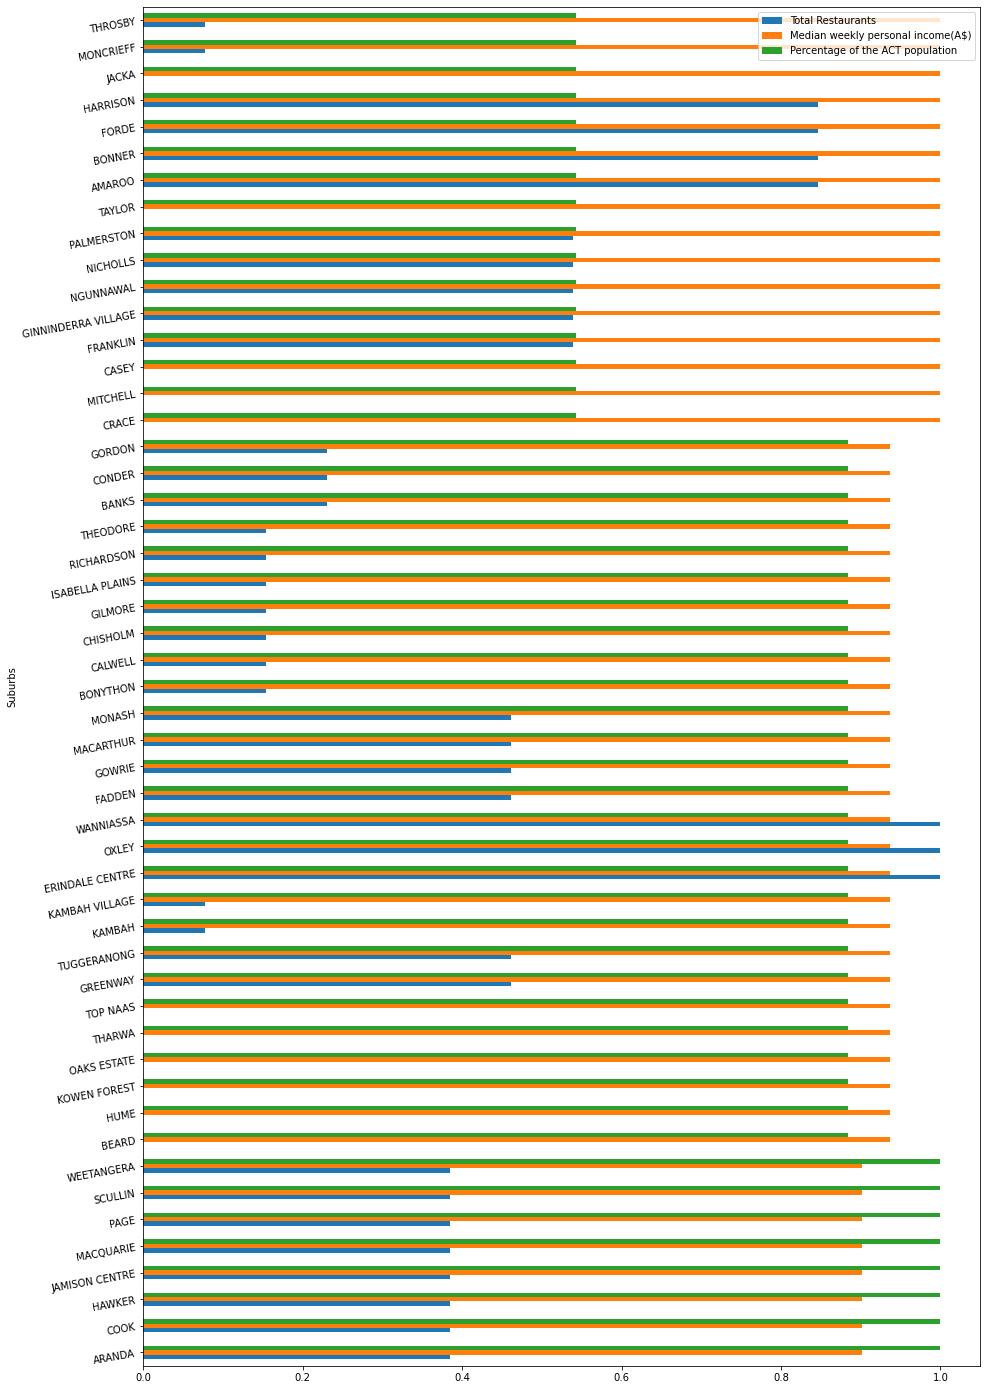

In [88]:
import matplotlib.pyplot as plt
df_max_scaled.plot(x="Suburbs", y=["Total Restaurants", "Median weekly personal income(A$)", "Percentage of the ACT population"], kind="barh", rot=10, fontsize=10,figsize=(15, 25))
plt.show()

In [92]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Suburbs'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged["Median weekly personal income(A$)"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) +'\nMedian weekley incomeA$: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters